This project will focus on analysis of where crimes happen in Chicago and how they are affected by various factors. The client(s) can include law<br> enforcement, the government, or the residents of Chicago. <br>
<br>It's important to know the pattern of crimes in the city and how they are affected by other factors. For law enforcement, they would be able to allocate <br>
their limited resources more effectively by sending officers to where they are likely needed the most. While crime pattern analysis is useful, the factors <br>
that contribute/affect where and what kind of crimes happen are important as well. These factors can include but not limited to: weather, income level, <br>
time of the day, public transit, poverty levels, unemployment, school closings, and demographics. If there is a correlation between crimes and one or <br>
more of these factors, actions can be taken to mitigate the situation if possible. With regards to local residents, the analysis can be useful for them <br>
to avoid certain areas during a certain time period especially when public transit stops are invovled. <br>
<br>Various data files will be used to help aid the analysis including the main crime data set from city of Chicago data portal. This data set contains <br>
<b><a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">crime data</a></b> collected over the course of 16
years between 2001 and 2016 and can be downloaded as a single csv file. The <b><a href="https://www.ncdc.noaa.gov/cdo-web/">weather data</a></b><br>is collected from NOAA website also between 2001 and 2016. The data is split into two halves because NOAA only allows a certain amount <br> information to be downloaded at a time. The file has daily summaries where things like temperature, precipitation, snow, date and coordinates are included.<br> To explore other factors, I also downloaded the following data sets to aid the analysis: <br>
<b>School closing data</b> from: <a href="https://wbez-assets.s3.amazonaws.com/WBEZ-Graphics/SchoolChart.html"> school closing data </a> <br>
<b>Unemployment data</b> from: <a href="http://www.ides.illinois.gov/LMI/Pages/Historical_Monthly_Annual_Data.aspx"> unemployment data </a><br>
<b>Chicago L transit stops</b> from: <a href="https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme"> L stops data </a><br>
Census data from 2010 census from US Census Buerau and they include: <br>
<b>Education, income, poverty levels, and race</b> data broken down by community in Chicago. They are downloaded from the following link: <a href="http://robparal.blogspot.com/2012/05/hard-to-find-census-data-on-chicago.html?m=1"> Chicago census data </a> <br>
These data files are collected either as csv files or plain html text. The html text is converted to csv in Excel. With all the data files collected, I can then <br>
begin my data cleaning and analysis in the following sections.

<h3>Data merging, cleaning and wrangling</h3>

In [9]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps                                #used for plotting data on google maps using an API
import gmaps.datasets
import os
from matplotlib import cm
import ipywidgets as widgets
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
pd.set_option('display.width', 500)
#plt.rcParams['figure.dpi']= 150
pd.set_option('max_columns', 60)

In [4]:
#Since there are two weather data files, I first merged them into 1 file
weather1=pd.read_csv('data/Crime/weather1.csv')
weather2=pd.read_csv('data/Crime/weather2.csv')
#Check to see if they have the same shape
print(weather1.shape, weather2.shape)

(3652, 34) (2515, 30)


In [5]:
#Looks like the second file has less columns. Let's take a look at both files and see what we can drop
weather1.head()

STATION                                        NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TSUN  WT01  WT02  WT03  WT04  WT05  WT06  WT07  WT08  WT09  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  WV03  WV20
0  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  15.0    24     5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-02   0.0   0.0  15.0  12.0    19     5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-03   0.0   0.0  14.0  18.0    28     7   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN
3  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-04   0.0   0.0  14.0  25.0    30    19   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
4  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-05   0.0   0.0  13.0  29.0    36    21   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [6]:
weather2.head()

STATION                                        NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  WT05  WT06  WT08  WT09  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22
0  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2011-01-01   0.0   0.0   0.0   NaN  41.0  14.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN
1  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2011-01-02   0.0   0.0   0.0   NaN  24.0  12.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2011-01-03   0.0   0.0   0.0   NaN  36.0  22.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
3  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2011-01-04   0.0   0.0   0.0   NaN  30.0  13.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
4  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2011-01-05   0.0   0.0   0.0   NaN  31.0   8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN

The WT columns are weather types and they are denoted by numbers from 01 to 19 and 21 and 22 (in the column names). Each is a difference weather <br>
type. The WV is weather in the vicinity. It can have five values: 01, 03, 07, 18 and 20. In those columns, 1.0 means that's the weather type of that day and <br>
nan means not that weather type. We can consolidate all those WT columns into one column 'weather type' and assign a value to represent the weather <br>
type of that day according to the number in its column names. A dictionary can be constructed to map the value to a weather type as a string. We will drop <br>
the WV columns as they are irrelavant for the analysis.

In [7]:
#Contruct a dictionary to map WT values to actual weather types according to NOAA documentation
weather_type={'WT01': 'Fog, ice fog, or freezing fog', 'WT02': 'Heavy fog or freezing fog', 'WT03': 'Thunder', 'WT04': 'Ice pellets, sleet, snow pellets, or small hail',
                            'WT05': 'Hail', 'WT06': 'Glaze or rime', 'WT07': 'Dust, blowing dust, or blowing obstruction', 'WT08': 'Smoke or haze', 
                            'WT09': 'Blowing or drifting snow',  'WT10': 'Tornado, waterspout, or funnel cloud', 'WT11': 'High or damaging winds', 'WT12': 'Blowing spray', 
                            'WT13': 'Mist', 'WT14': 'Drizzle', 'WT15': 'Freezing drizzle', 'WT16': 'Rain', 'WT17': 'Freezing rain', 
                            'WT18': 'Snow, snow pellets, snow grains, or ice crystals', 'WT19': 'Unknown source of precipitation', 
                            'WT20': 'Rain or snow shower', 'WT21': 'Ground fog', 'WT22': 'Ice fog or freezing fog'}

#First drop WV columns and then slice the WT columns into a new data frame
weather1.drop(['WV03', 'WV20'], axis=1, inplace=True)
weather1_wt=weather1.iloc[:, 13:34]
weather2_wt=weather2.iloc[:,12:30 ]

#Write a function to return a list with all weather types
def extract_weather_type(weather_types):
    """This function take a data frame as an argument and returns all weather types for each row in a list"""    
    weather_type_list=[]
    for i in range(len(weather_types)):
        type_per_row=[]
        for k, n in enumerate(weather_types.columns):
            if weather_types.iloc[i, k]==1.0:
                type_per_row.append(n)
        if len(type_per_row)==0:
            weather_type_list.append('Unknown')
        else:
            weather_type_list.append([weather_type[x] for x in type_per_row])
    return(weather_type_list)

#Now convert all the weather types of the two weather data sets into one single list
weather_list1=extract_weather_type(weather1_wt)
weather_list2=extract_weather_type(weather2_wt)

#Now drop all WT columns in original data sets and then add a new column named "weather_type"
weather1.drop(weather1_wt.columns, axis=1, inplace=True)
weather2.drop(weather2_wt.columns, axis=1, inplace=True)

#Add a new column to each data frame
weather1['weather_type']=weather_list1
weather2['weather_type']=weather_list2

#Drop TSUN (total sunshine) column of the first data frame since it's not present in data frame 2.
weather1.drop('TSUN', axis=1, inplace=True)

#Now the two data frame should contain the same columns, we can combine them into 1 data frame
weather=weather1.append(weather2)
weather.reset_index(inplace=True)
weather.head()

index      STATION                                        NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN                                       weather_type
0      0  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  15.0  24.0   5.0                                            Unknown
1      1  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-02   0.0   0.0  15.0  12.0  19.0   5.0                                            Unknown
2      2  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-03   0.0   0.0  14.0  18.0  28.0   7.0  [Fog, ice fog, or freezing fog, Mist, Snow, sn...
3      3  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-04   0.0   0.0  14.0  25.0  30.0  19.0  [Fog, ice fog, or freezing fog, Smoke or haze,...
4      4  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US    41.995   -87.9336      201.8  2001-01-05   0.0   0.0  13.0  29.0  36.0  21.0                                    [Smoke or haze]

In [8]:
#Check the new data frame
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            3365 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


In [9]:
t_ave=(weather.TMAX+weather.TMIN)/2
weather['TAVG']=t_ave
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            6166 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


The 'PRCP' column has 1 null value, the 'SNOW' column has 2 null values, the 'SNWD' column has 33 null values, and all the temperature columns have <br>
1 null value. For precipitation values we will fill with 0 but for temperatures we will fill these missing values with forward fill.

Looks good but the TAVG has some null values. Since TAVG=(TMAX+TMIN)/2, we can recalculate all the average temperatures and recontruct the column

In [10]:
weather.loc[:, 'PRCP':'SNWD']=weather.loc[:, 'PRCP':'SNWD'].fillna(value=0)
weather.loc[:, 'TAVG': 'TMIN']=weather.loc[:, 'TAVG': 'TMIN'].fillna(method='ffill')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


Now we have a complete weather data frame to work with. Since all the stations and names are the same, we can discard those two columns as well

In [11]:
weather.drop(['STATION', 'NAME'], axis=1, inplace=True)

Next, let's convert the 'DATE' column to a datetime object and we can then use it to merge to the crime data set

In [12]:
weather['DATE']=pd.to_datetime(weather['DATE'])
weather['date']=weather['DATE'].astype(str)
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 13 columns):
index           6167 non-null int64
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null datetime64[ns]
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
date            6167 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 626.4+ KB


index  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN                                       weather_type        date
0      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0                                            Unknown  2001-01-01
1      1    41.995   -87.9336      201.8 2001-01-02   0.0   0.0  15.0  12.0  19.0   5.0                                            Unknown  2001-01-02
2      2    41.995   -87.9336      201.8 2001-01-03   0.0   0.0  14.0  17.5  28.0   7.0  [Fog, ice fog, or freezing fog, Mist, Snow, sn...  2001-01-03
3      3    41.995   -87.9336      201.8 2001-01-04   0.0   0.0  14.0  24.5  30.0  19.0  [Fog, ice fog, or freezing fog, Smoke or haze,...  2001-01-04
4      4    41.995   -87.9336      201.8 2001-01-05   0.0   0.0  13.0  28.5  36.0  21.0                                    [Smoke or haze]  2001-01-05

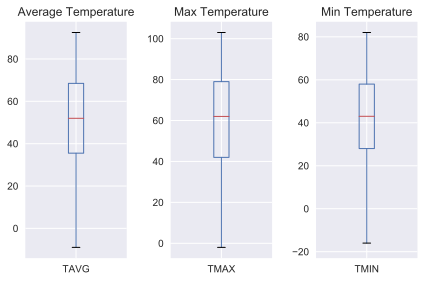

In [11]:
#Check to see how the numerica data look
descrp=['Average Temperature', 'Max Temperature', 'Min Temperature']
fig, axes=plt.subplots(nrows=1, ncols=3)
for k,n in enumerate(['TAVG', 'TMAX', 'TMIN']):
    weather[n].plot(kind='box', ax=axes.flat[k], title=descrp[k])
plt.tight_layout()   
plt.show()

Now we are going to import the crime data. This is a farily large data set and after we import it and clean it, we can break it down by years. We first load <br>
1000 rows to check the data.

In [13]:
crime_1k=pd.read_csv('data/crime/crimes_chi.csv', nrows=1000)
crime_1k.head()

ID Case Number                    Date                  Block  IUCR       Primary Type                   Description               Location Description  Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location
0  4647369    HM155213  01/31/2006 12:13:05 PM   066XX N BOSWORTH AVE  1811          NARCOTICS  POSS: CANNABIS 30GMS OR LESS           SCHOOL, PUBLIC, BUILDING    True     False  2432        24    40               1       18     1164737.0     1944193.0  2006  04/15/2016 08:55:02 AM  42.002478 -87.669297   (42.002478396, -87.66929687)
1  4647370    HM245080  03/21/2006 07:00:00 PM    062XX S WESTERN AVE  1330  CRIMINAL TRESPASS                       TO LAND     PARKING LOT/GARAGE(NON.RESID.)    True     False   825         8    15              66       26     1161441.0     1863309.0  2006  04/15/2016 08:55:02 AM  41.780595 -87.683676   (41.780595495, -87.68367553)
2  4647372    HM171175  02/09/2006 01:44:41 AM    058XX S SHIELDS AVE  1811          NARCOTICS  POSS: CANNABIS 30GMS OR LESS                             STREET    True     False   711         7    20              68       18     1174958.0     1866097.0  2006  04/15/2016 08:55:02 AM  41.787955 -87.634037  (41.787955143, -87.634036744)
3  4647373    HM244805  03/21/2006 04:45:00 PM  011XX N SPAULDING AVE  0810              THEFT                     OVER $500  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1121        11    26              23       06     1154100.0     1907414.0  2006  04/15/2016 08:55:02 AM  41.901774 -87.709415  (41.901774026, -87.709414574)
4  4647374    HM245851  03/21/2006 10:00:00 PM     080XX S DOBSON AVE  0820              THEFT                $500 AND UNDER                             STREET   False     False   631         6     8              44       06     1184622.0     1851863.0  2006  04/15/2016 08:55:02 AM  41.748675 -87.599049  (41.748674558, -87.599048654)

We need to convert the date to a timestamp for easy manipulation and also merging with weather data. Let's read in the file into a data frame.

In [2]:
crimes=pd.read_csv('data/crime/crimes_chi.csv', parse_dates=True)

Let's check this data set and see if there are missing values or outliers.

In [3]:
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478356 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6478356 non-null int64
Case Number             6478352 non-null object
Date                    6478356 non-null object
Block                   6478356 non-null object
IUCR                    6478356 non-null object
Primary Type            6478356 non-null object
Description             6478356 non-null object
Location Description    6475409 non-null object
Arrest                  6478356 non-null bool
Domestic                6478356 non-null bool
Beat                    6478356 non-null int64
District                6478307 non-null float64
Ward                    5863502 non-null float64
Community Area          5862326 non-null float64
FBI Code                6478356 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6478356 non-null int64
Updated On              6

The 'Ward' and 'Community Area' have a lot of missing values but they could be useful for building models to predict crimes. We will save two versions <br>
of this data frame. One with missing values of 'Ward' and 'Community' for EDA and one without all the missing values for maching learning purposes.

In [6]:
crimes_all=crimes[~crimes['Latitude'].isnull()]

In [8]:
crimes_all.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391699 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6391699 non-null int64
Case Number             6391696 non-null object
Date                    6391699 non-null object
Block                   6391699 non-null object
IUCR                    6391699 non-null object
Primary Type            6391699 non-null object
Description             6391699 non-null object
Location Description    6389660 non-null object
Arrest                  6391699 non-null bool
Domestic                6391699 non-null bool
Beat                    6391699 non-null int64
District                6391650 non-null float64
Ward                    5786097 non-null float64
Community Area          5785024 non-null float64
FBI Code                6391699 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6391699 non-null int64
Updated On              6

In [9]:
#Save crimes_all as csv
crimes_all.to_csv('data/crime/crimes_all.csv')

In [10]:
#We will load the file when we need to. Delete for now.
del crimes_all

In [11]:
crimes.head()

ID Case Number                    Date                  Block  IUCR       Primary Type                   Description               Location Description  Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location
0  4647369    HM155213  01/31/2006 12:13:05 PM   066XX N BOSWORTH AVE  1811          NARCOTICS  POSS: CANNABIS 30GMS OR LESS           SCHOOL, PUBLIC, BUILDING    True     False  2432      24.0  40.0             1.0       18     1164737.0     1944193.0  2006  04/15/2016 08:55:02 AM  42.002478 -87.669297   (42.002478396, -87.66929687)
1  4647370    HM245080  03/21/2006 07:00:00 PM    062XX S WESTERN AVE  1330  CRIMINAL TRESPASS                       TO LAND     PARKING LOT/GARAGE(NON.RESID.)    True     False   825       8.0  15.0            66.0       26     1161441.0     1863309.0  2006  04/15/2016 08:55:02 AM  41.780595 -87.683676   (41.780595495, -87.68367553)
2  4647372    HM171175  02/09/2006 01:44:41 AM    058XX S SHIELDS AVE  1811          NARCOTICS  POSS: CANNABIS 30GMS OR LESS                             STREET    True     False   711       7.0  20.0            68.0       18     1174958.0     1866097.0  2006  04/15/2016 08:55:02 AM  41.787955 -87.634037  (41.787955143, -87.634036744)
3  4647373    HM244805  03/21/2006 04:45:00 PM  011XX N SPAULDING AVE  0810              THEFT                     OVER $500  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1121      11.0  26.0            23.0       06     1154100.0     1907414.0  2006  04/15/2016 08:55:02 AM  41.901774 -87.709415  (41.901774026, -87.709414574)
4  4647374    HM245851  03/21/2006 10:00:00 PM     080XX S DOBSON AVE  0820              THEFT                $500 AND UNDER                             STREET   False     False   631       6.0   8.0            44.0       06     1184622.0     1851863.0  2006  04/15/2016 08:55:02 AM  41.748675 -87.599049  (41.748674558, -87.599048654)

First drop the 'Ward' and 'Community Area' columns then drop all null rows especially when latitude and longitude information is missing

In [12]:
crimes.drop(['Ward', 'Community Area'], axis=1, inplace=True)
crimes.dropna(inplace=True)

In [13]:
#Check to see if the data frame now does not have any missing values
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389608 entries, 0 to 6478355
Data columns (total 20 columns):
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null object
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389608 non-null float64
Longitude               63

In [16]:
Date=pd.to_datetime(crimes['Date'])
crimes.index=Date
crimes.sort_index(inplace=True)

Now I am going to merge with the weather data to use for further analysis

In [21]:
#First create a date columns to link to weather data
crimes['date']=crimes['Date'].dt.date
crimes['date']=crimes['date'].astype(str)
crimes.head()

ID Case Number       Date                Block  IUCR         Primary Type              Description               Location Description  Arrest  Domestic  Beat  District FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location        date
Date                                                                                                                                                                                                                                                                                                                        
2001-01-01  3272413    HK299011 2001-01-01  076XX S EMERALD AVE  0842                THEFT  AGG: FINANCIAL ID THEFT                          RESIDENCE   False     False   621       6.0       06     1172658.0     1854465.0  2001  03/31/2006 10:03:38 PM  41.756087 -87.642812  (41.756086589, -87.642812325)  2001-01-01
2001-01-01  5508664    HN320275 2001-01-01  009XX N HARDING AVE  0266  CRIM SEXUAL ASSAULT                PREDATORY                          RESIDENCE   False      True  1112      11.0       02     1149843.0     1906023.0  2001  06/11/2007 03:52:33 PM  41.898041 -87.725087  (41.898040875, -87.725087394)  2001-01-01
2001-01-01  2743135    HJ380339 2001-01-01    039XX N MOZART ST  0266  CRIM SEXUAL ASSAULT                PREDATORY                          APARTMENT    True     False  1733      17.0       02     1156711.0     1926359.0  2001  08/17/2015 03:03:40 PM  41.953708 -87.699309  (41.953708013, -87.699309457)  2001-01-01
2001-01-01  2126730    HH368190 2001-01-01  060XX W ARDMORE AVE  0281  CRIM SEXUAL ASSAULT           NON-AGGRAVATED  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1622      16.0       02     1135010.0     1938218.0  2001  08/17/2015 03:03:40 PM  41.986663 -87.778803  (41.986663058, -87.778803492)  2001-01-01
2001-01-01  1316070     G007383 2001-01-01        041XX W 24 PL  2820        OTHER OFFENSE         TELEPHONE THREAT                          RESIDENCE   False     False  1013      10.0       26     1149237.0     1887440.0  2001  08/17/2015 03:03:40 PM  41.847059 -87.727795     (41.84705874, -87.7277947)  2001-01-01

Now the 'date' column can be used to merge with weather data

In [22]:
weather.head()

index  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN                                       weather_type        date
0      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0                                            Unknown  2001-01-01
1      1    41.995   -87.9336      201.8 2001-01-02   0.0   0.0  15.0  12.0  19.0   5.0                                            Unknown  2001-01-02
2      2    41.995   -87.9336      201.8 2001-01-03   0.0   0.0  14.0  17.5  28.0   7.0  [Fog, ice fog, or freezing fog, Mist, Snow, sn...  2001-01-03
3      3    41.995   -87.9336      201.8 2001-01-04   0.0   0.0  14.0  24.5  30.0  19.0  [Fog, ice fog, or freezing fog, Smoke or haze,...  2001-01-04
4      4    41.995   -87.9336      201.8 2001-01-05   0.0   0.0  13.0  28.5  36.0  21.0                                    [Smoke or haze]  2001-01-05

In [23]:
pd.merge(crimes, weather, on='date', how='left').head()

ID Case Number       Date                Block  IUCR         Primary Type              Description               Location Description  Arrest  Domestic  Beat  District FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location        date  index  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN weather_type
0  3272413    HK299011 2001-01-01  076XX S EMERALD AVE  0842                THEFT  AGG: FINANCIAL ID THEFT                          RESIDENCE   False     False   621       6.0       06     1172658.0     1854465.0  2001  03/31/2006 10:03:38 PM  41.756087 -87.642812  (41.756086589, -87.642812325)  2001-01-01      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
1  5508664    HN320275 2001-01-01  009XX N HARDING AVE  0266  CRIM SEXUAL ASSAULT                PREDATORY                          RESIDENCE   False      True  1112      11.0       02     1149843.0     1906023.0  2001  06/11/2007 03:52:33 PM  41.898041 -87.725087  (41.898040875, -87.725087394)  2001-01-01      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2  2743135    HJ380339 2001-01-01    039XX N MOZART ST  0266  CRIM SEXUAL ASSAULT                PREDATORY                          APARTMENT    True     False  1733      17.0       02     1156711.0     1926359.0  2001  08/17/2015 03:03:40 PM  41.953708 -87.699309  (41.953708013, -87.699309457)  2001-01-01      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
3  2126730    HH368190 2001-01-01  060XX W ARDMORE AVE  0281  CRIM SEXUAL ASSAULT           NON-AGGRAVATED  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1622      16.0       02     1135010.0     1938218.0  2001  08/17/2015 03:03:40 PM  41.986663 -87.778803  (41.986663058, -87.778803492)  2001-01-01      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
4  1316070     G007383 2001-01-01        041XX W 24 PL  2820        OTHER OFFENSE         TELEPHONE THREAT                          RESIDENCE   False     False  1013      10.0       26     1149237.0     1887440.0  2001  08/17/2015 03:03:40 PM  41.847059 -87.727795     (41.84705874, -87.7277947)  2001-01-01      0    41.995   -87.9336      201.8 2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown

In [24]:
#merge the two data frames into one new data frame for analysis
crimes_wea=pd.merge(crimes, weather, on='date', how='left')
crimes_wea.tail()

ID Case Number                Date                  Block  IUCR     Primary Type              Description Location Description  Arrest  Domestic  Beat  District FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location        date  index  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN                                       weather_type
6389603  11147510    JA509544 2017-11-12 23:30:00        057XX W LAKE ST  0486          BATTERY  DOMESTIC BATTERY SIMPLE             SIDEWALK    True      True  1512      15.0      08B     1138028.0     1902221.0  2017  11/19/2017 03:51:13 PM  41.887829 -87.768575  (41.887829366, -87.768575322)  2017-11-12   2507    41.995   -87.9336      201.8 2017-11-12  0.13   0.0   0.0  38.0  40.0  36.0  [Fog, ice fog, or freezing fog, Ice pellets, s...
6389604  11149104    JA511655 2017-11-12 23:30:00  022XX W CHARLESTON ST  0820            THEFT           $500 AND UNDER               STREET   False     False  1432      14.0       06     1161186.0     1914084.0  2017  11/19/2017 03:51:13 PM  41.919933 -87.683201  (41.919932633, -87.683201087)  2017-11-12   2507    41.995   -87.9336      201.8 2017-11-12  0.13   0.0   0.0  38.0  40.0  36.0  [Fog, ice fog, or freezing fog, Ice pellets, s...
6389605  11147551    JA509596 2017-11-12 23:30:00    047XX N ASHLAND AVE  0610         BURGLARY           FORCIBLE ENTRY     RESIDENCE-GARAGE   False     False  1912      19.0       05     1164804.0     1931504.0  2017  11/19/2017 03:51:13 PM  41.967658 -87.669412  (41.967657963, -87.669412246)  2017-11-12   2507    41.995   -87.9336      201.8 2017-11-12  0.13   0.0   0.0  38.0  40.0  36.0  [Fog, ice fog, or freezing fog, Ice pellets, s...
6389606  11147517    JA509554 2017-11-12 23:32:00    081XX S CORNELL AVE  1310  CRIMINAL DAMAGE              TO PROPERTY            RESIDENCE   False      True   411       4.0       14     1188677.0     1851516.0  2017  11/19/2017 03:51:13 PM  41.747626 -87.584201  (41.747626436, -87.584200954)  2017-11-12   2507    41.995   -87.9336      201.8 2017-11-12  0.13   0.0   0.0  38.0  40.0  36.0  [Fog, ice fog, or freezing fog, Ice pellets, s...
6389607  11147527    JA509559 2017-11-12 23:45:00      118XX S MORGAN ST  0560          ASSAULT                   SIMPLE            RESIDENCE   False      True   524       5.0      08A     1171790.0     1826339.0  2017  11/19/2017 03:51:13 PM  41.678924 -87.646815  (41.678923809, -87.646815265)  2017-11-12   2507    41.995   -87.9336      201.8 2017-11-12  0.13   0.0   0.0  38.0  40.0  36.0  [Fog, ice fog, or freezing fog, Ice pellets, s...

We can then save the new data frame as a csv file for future analysis. In the following sections, I will use other data sets and this new data with weather <br>
information to do some exploratory analysis

In [27]:
#Write to a CSV file for following processing
crimes_wea.to_csv('data/crime/crimes_weather.csv')

In [2]:
#12-15-17 Continue. We will try some visulizations this time.

In [2]:
crime_wea=pd.read_csv('data/crime/crimes_weather.csv')

In [3]:
#The 'Arrest' column and 'Domestic' column contain boolean like data but they are strings. Let's convert them to bool type
crime_wea.loc[:, ['Arrest', 'Domestic']]=crime_wea.loc[:, ['Arrest', 'Domestic']].astype('bool')

In [4]:
crime_wea.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389608 entries, 0 to 6389607
Data columns (total 34 columns):
Unnamed: 0              6389608 non-null int64
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null object
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389

In [4]:
crime_wea['Date']=pd.to_datetime(crime_wea['Date'])
crime_wea.index=crime_wea['Date']

In [6]:
crime_wea.head(10)

Unnamed: 0       ID Case Number       Date                     Block  IUCR         Primary Type              Description               Location Description  Arrest  Domestic  Beat  District FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location        date  index  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN weather_type
Date                                                                                                                                                                                                                                                                                                                                                                                                                                             
2001-01-01           0  3272413    HK299011 2001-01-01       076XX S EMERALD AVE  0842                THEFT  AGG: FINANCIAL ID THEFT                          RESIDENCE   False     False   621       6.0       06     1172658.0     1854465.0  2001  03/31/2006 10:03:38 PM  41.756087 -87.642812  (41.756086589, -87.642812325)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           1  5508664    HN320275 2001-01-01       009XX N HARDING AVE  0266  CRIM SEXUAL ASSAULT                PREDATORY                          RESIDENCE   False      True  1112      11.0       02     1149843.0     1906023.0  2001  06/11/2007 03:52:33 PM  41.898041 -87.725087  (41.898040875, -87.725087394)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           2  2743135    HJ380339 2001-01-01         039XX N MOZART ST  0266  CRIM SEXUAL ASSAULT                PREDATORY                          APARTMENT    True     False  1733      17.0       02     1156711.0     1926359.0  2001  08/17/2015 03:03:40 PM  41.953708 -87.699309  (41.953708013, -87.699309457)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           3  2126730    HH368190 2001-01-01       060XX W ARDMORE AVE  0281  CRIM SEXUAL ASSAULT           NON-AGGRAVATED  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1622      16.0       02     1135010.0     1938218.0  2001  08/17/2015 03:03:40 PM  41.986663 -87.778803  (41.986663058, -87.778803492)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           4  1316070     G007383 2001-01-01             041XX W 24 PL  2820        OTHER OFFENSE         TELEPHONE THREAT                          RESIDENCE   False     False  1013      10.0       26     1149237.0     1887440.0  2001  08/17/2015 03:03:40 PM  41.847059 -87.727795     (41.84705874, -87.7277947)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           5  1313893     G000035 2001-01-01         027XX W NELSON ST  1310      CRIMINAL DAMAGE              TO PROPERTY                          RESIDENCE   False     False  1411      14.0       14     1157359.0     1920111.0  2001  08/17/2015 03:03:40 PM  41.936550 -87.697098  (41.936549915, -87.697097823)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           6  1309913     G000355 2001-01-01        026XX S INDIANA AV  1310      CRIMINAL DAMAGE              TO PROPERTY                          APARTMENT   False     False  2112       2.0       14     1178078.0     1886818.0  2001  08/17/2015 03:03:40 PM  41.844745 -87.621968  (41.844745115, -87.621968071)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           7  1780042     G600951 2001-01-01        105XX S PARNELL AV  2825        OTHER OFFENS

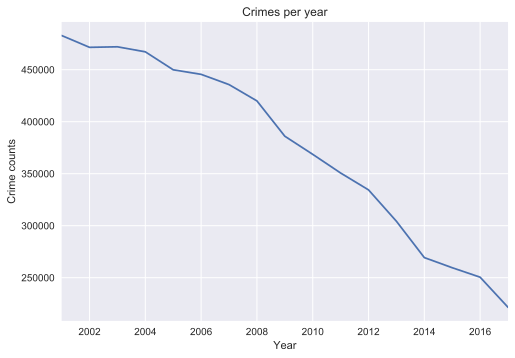

In [6]:
#First let's see how crimes change over time by year
crime_wea['ID'].resample('A').count().plot()
plt.xlabel('Year')
plt.ylabel('Crime counts')
plt.title('Crimes per year')
plt.show()

The crime counts are going down from this plot from 2001 to 2016. Since these crimes are reported crimes, we can not rule out the possibility that the <br>
actual number of people that are reporting is decreasing but not crimes themselves. Also, individual crime types may not exhibit the same pattern

Since there are so many crime types, I want to focus on the most relevant ones to concentrate our analysis. Let's do a value count of the 'Primary Type'

In [46]:
crime_wea['Primary Type'].value_counts()

THEFT                                1332798
BATTERY                              1173671
CRIMINAL DAMAGE                       738270
NARCOTICS                             685232
OTHER OFFENSE                         396399
ASSAULT                               395259
BURGLARY                              373315
MOTOR VEHICLE THEFT                   300251
ROBBERY                               243303
DECEPTIVE PRACTICE                    226211
CRIMINAL TRESPASS                     185396
PROSTITUTION                           66896
WEAPONS VIOLATION                      64865
PUBLIC PEACE VIOLATION                 46191
OFFENSE INVOLVING CHILDREN             40131
CRIM SEXUAL ASSAULT                    23663
SEX OFFENSE                            22512
GAMBLING                               14118
INTERFERENCE WITH PUBLIC OFFICER       13788
LIQUOR LAW VIOLATION                   13637
ARSON                                  10674
HOMICIDE                                8764
KIDNAPPING

I have decided to analyze the following felonies: <b>'Theft', 'Battery', 'Narcotics', 'Burglary', 'Robbery', 'Weapon violation', 'Sex offense', 'Homicide'</b> <br>
for some EDA. The whole data set can be used for some modeling using machine learning give the large amount of data points <br>
<br>We can first filter out those crime types and make a new data frame.

In [5]:
#From the above info, we are going to combine the 'CRIM SEXUAL ASSAULT' and 'SEX OFFENSE' into 'SEX OFFENSE'
crime_wea['Primary Type']=crime_wea['Primary Type'].str.replace('CRIM SEXUAL ASSAULT', 'SEX OFFENSE')

In [8]:
crime_wea.head(10)

Unnamed: 0       ID Case Number       Date                     Block  IUCR     Primary Type              Description               Location Description  Arrest  Domestic  Beat  District FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location        date  index  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN weather_type
Date                                                                                                                                                                                                                                                                                                                                                                                                                                         
2001-01-01           0  3272413    HK299011 2001-01-01       076XX S EMERALD AVE  0842            THEFT  AGG: FINANCIAL ID THEFT                          RESIDENCE   False     False   621       6.0       06     1172658.0     1854465.0  2001  03/31/2006 10:03:38 PM  41.756087 -87.642812  (41.756086589, -87.642812325)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           1  5508664    HN320275 2001-01-01       009XX N HARDING AVE  0266      SEX OFFENSE                PREDATORY                          RESIDENCE   False      True  1112      11.0       02     1149843.0     1906023.0  2001  06/11/2007 03:52:33 PM  41.898041 -87.725087  (41.898040875, -87.725087394)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           2  2743135    HJ380339 2001-01-01         039XX N MOZART ST  0266      SEX OFFENSE                PREDATORY                          APARTMENT    True     False  1733      17.0       02     1156711.0     1926359.0  2001  08/17/2015 03:03:40 PM  41.953708 -87.699309  (41.953708013, -87.699309457)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           3  2126730    HH368190 2001-01-01       060XX W ARDMORE AVE  0281      SEX OFFENSE           NON-AGGRAVATED  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1622      16.0       02     1135010.0     1938218.0  2001  08/17/2015 03:03:40 PM  41.986663 -87.778803  (41.986663058, -87.778803492)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           4  1316070     G007383 2001-01-01             041XX W 24 PL  2820    OTHER OFFENSE         TELEPHONE THREAT                          RESIDENCE   False     False  1013      10.0       26     1149237.0     1887440.0  2001  08/17/2015 03:03:40 PM  41.847059 -87.727795     (41.84705874, -87.7277947)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           5  1313893     G000035 2001-01-01         027XX W NELSON ST  1310  CRIMINAL DAMAGE              TO PROPERTY                          RESIDENCE   False     False  1411      14.0       14     1157359.0     1920111.0  2001  08/17/2015 03:03:40 PM  41.936550 -87.697098  (41.936549915, -87.697097823)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           6  1309913     G000355 2001-01-01        026XX S INDIANA AV  1310  CRIMINAL DAMAGE              TO PROPERTY                          APARTMENT   False     False  2112       2.0       14     1178078.0     1886818.0  2001  08/17/2015 03:03:40 PM  41.844745 -87.621968  (41.844745115, -87.621968071)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown
2001-01-01           7  1780042     G600951 2001-01-01        105XX S PARNELL AV  2825    OTHER OFFENSE  HARASSMENT BY TELEPHONE              

In [49]:
#Check to make sure only 'Sex offense' is left
crime_wea['Primary Type'].value_counts()

THEFT                                1332798
BATTERY                              1173671
CRIMINAL DAMAGE                       738270
NARCOTICS                             685232
OTHER OFFENSE                         396399
ASSAULT                               395259
BURGLARY                              373315
MOTOR VEHICLE THEFT                   300251
ROBBERY                               243303
DECEPTIVE PRACTICE                    226211
CRIMINAL TRESPASS                     185396
PROSTITUTION                           66896
WEAPONS VIOLATION                      64865
PUBLIC PEACE VIOLATION                 46191
SEX OFFENSE                            46175
OFFENSE INVOLVING CHILDREN             40131
GAMBLING                               14118
INTERFERENCE WITH PUBLIC OFFICER       13788
LIQUOR LAW VIOLATION                   13637
ARSON                                  10674
HOMICIDE                                8764
KIDNAPPING                              6418
INTIMIDATI

In [6]:
#Now filter to select only those 8 crimes we are going to analyze
crimes_new=crime_wea[crime_wea['Primary Type'].isin(['THEFT', 'BATTERY', 'NARCOTICS', 'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 
                                                                                                 'SEX OFFENSE', 'HOMICIDE'])]

In [10]:
crimes_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3928123 entries, 2001-01-01 00:00:00 to 2017-11-12 23:30:00
Data columns (total 34 columns):
Unnamed: 0              3928123 non-null int64
ID                      3928123 non-null int64
Case Number             3928123 non-null object
Date                    3928123 non-null datetime64[ns]
Block                   3928123 non-null object
IUCR                    3928123 non-null object
Primary Type            3928123 non-null object
Description             3928123 non-null object
Location Description    3928123 non-null object
Arrest                  3928123 non-null bool
Domestic                3928123 non-null bool
Beat                    3928123 non-null int64
District                3928123 non-null float64
FBI Code                3928123 non-null object
X Coordinate            3928123 non-null float64
Y Coordinate            3928123 non-null float64
Year                    3928123 non-null int64
Updated On              3928123 non

In [14]:
#We can then save the new data frame
crimes_new.to_csv('crimes_new.csv')

In [4]:
#Read crimes_new.csv
crimes_new=pd.read_csv('data/crime/crimes_new.csv', index_col=0, parse_dates=True)

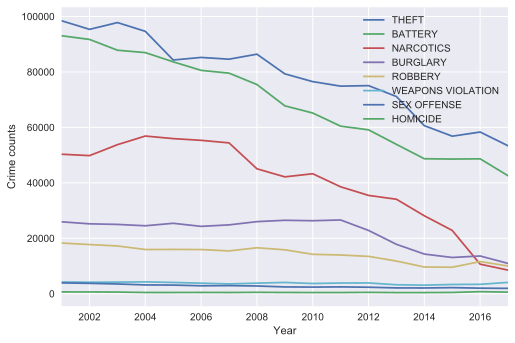

In [5]:
#Now let's look at the trend of these 8 crimes over 15 years
crime_types=['THEFT', 'BATTERY', 'NARCOTICS', 'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 'SEX OFFENSE', 'HOMICIDE']
for c in crime_types:
    one_crime=crimes_new[crimes_new['Primary Type']==c]
    one_crime['Primary Type'].resample('A').count().plot(label=c)
plt.xlabel('Year')
plt.ylabel('Crime counts')
plt.legend()
plt.show()

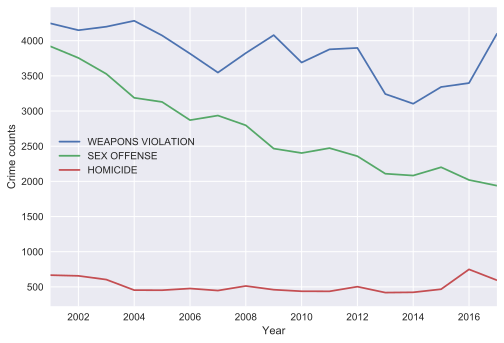

In [6]:
#It looks like 'weapon violation' , 'sex offense' and 'homicide' have low numbers compared to others so we need to plot them separately to see trends
for c in ['WEAPONS VIOLATION', 'SEX OFFENSE', 'HOMICIDE']:
    one_crime=crimes_new[crimes_new['Primary Type']==c]
    one_crime['Primary Type'].resample('A').count().plot(label=c)
plt.xlabel('Year')
plt.ylabel('Crime counts')
plt.legend()
plt.show()

Looks like 'Weapons violation' has several peaks and valleys and it increased after 2016 while 'sex offense' keeps going down. But  'Homicide' had a <br>
spike in 2016. Why is that?

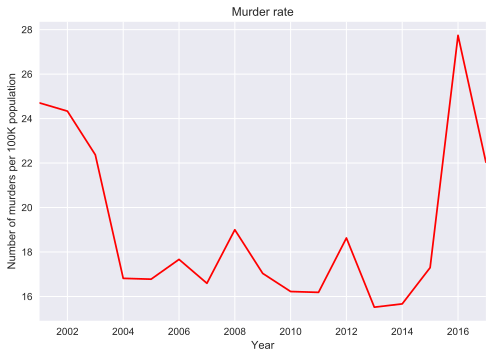

In [6]:
#Let's see the homicide rate per 100000 people in Chicago
homicides=crimes_new[crimes_new['Primary Type']=='HOMICIDE']
homicides_count=homicides['Primary Type'].resample('A').count()
chicago_pop=2700000
homicides_rate_per_100k=homicides_count/(chicago_pop/100000)
homicides_rate_per_100k.plot(color='red')
plt.title('Murder rate')
plt.xlabel('Year')
plt.ylabel('Number of murders per 100K population')
plt.show()

From the above graph we can see that in 2016, there was a whopping 11% increase in murder rate compared to 2015. The rate 28% in 2016 is not the <br> highest among other U.S. cities but consider the large population in Chicago, this is an alarming figure. Indeed, the total number of murders in 2016 in <br>
Chicago was <b>749</b> and it was the highest in all U.S. cities.

Let's do a symbol layer of all homicides in Chicago from 2001 and 2016 and see whether they concentrate in certain areas or scattered out especially <br>
near public transportations.

In [7]:
#Let's get the public transit locations using L stops coordinates to see whether murders are far away from public transportation
L_stops=pd.read_csv('data/crime/l_stops.csv')
L_stops.head()

STOP_ID DIRECTION_ID                          STOP_NAME          STATION_NAME           STATION_DESCRIPTIVE_NAME  MAP_ID   ADA    RED   BLUE      G    BRN      P   Pexp      Y    Pnk      O                 Location
0    30161            E                  18th (Loop-bound)                  18th                   18th (Pink Line)   40830  True  False  False  False  False  False  False  False   True  False  (41.857908, -87.669147)
1    30162            W           18th (54th/Cermak-bound)                  18th                   18th (Pink Line)   40830  True  False  False  False  False  False  False  False   True  False  (41.857908, -87.669147)
2    30022            N           35th/Archer (Loop-bound)           35th/Archer          35th/Archer (Orange Line)   40120  True  False  False  False  False  False  False  False  False   True  (41.829353, -87.680622)
3    30023            S         35th/Archer (Midway-bound)           35th/Archer          35th/Archer (Orange Line)   40120  True  False  False  False  False  False  False  False  False   True  (41.829353, -87.680622)
4    30213            N  35-Bronzeville-IIT (Harlem-bound)  35th-Bronzeville-IIT  35th-Bronzeville-IIT (Green Line)   41120  True  False  False   True  False  False  False  False  False  False  (41.831677, -87.625826)

The location info is storeed in the 'Location' column. We can extract it into latitude and longitutde.

In [8]:
#Let's define some functions to extract latitude and longitude
def get_lat(x):
    x=x[1:x.index(',')]
    x=float(x)
    return(x)

def get_lon(x):
    x=x[(x.index(',')+2):-1]
    x=float(x)
    return(x)
#Then apply each to the 'location' column
L_stops['Latitude']=L_stops['Location'].apply(get_lat)
L_stops['Longitude']=L_stops['Location'].apply(get_lon)
L_stops.head()

STOP_ID DIRECTION_ID                          STOP_NAME          STATION_NAME           STATION_DESCRIPTIVE_NAME  MAP_ID   ADA    RED   BLUE      G    BRN      P   Pexp      Y    Pnk      O                 Location   Latitude  Longitude
0    30161            E                  18th (Loop-bound)                  18th                   18th (Pink Line)   40830  True  False  False  False  False  False  False  False   True  False  (41.857908, -87.669147)  41.857908 -87.669147
1    30162            W           18th (54th/Cermak-bound)                  18th                   18th (Pink Line)   40830  True  False  False  False  False  False  False  False   True  False  (41.857908, -87.669147)  41.857908 -87.669147
2    30022            N           35th/Archer (Loop-bound)           35th/Archer          35th/Archer (Orange Line)   40120  True  False  False  False  False  False  False  False  False   True  (41.829353, -87.680622)  41.829353 -87.680622
3    30023            S         35th/Archer (Midway-bound)           35th/Archer          35th/Archer (Orange Line)   40120  True  False  False  False  False  False  False  False  False   True  (41.829353, -87.680622)  41.829353 -87.680622
4    30213            N  35-Bronzeville-IIT (Harlem-bound)  35th-Bronzeville-IIT  35th-Bronzeville-IIT (Green Line)   41120  True  False  False   True  False  False  False  False  False  False  (41.831677, -87.625826)  41.831677 -87.625826

In [19]:
#I will use the gmaps library to plot on google maps
#Load google static map API key
api_key=open('data/api_key.txt')
gmaps.configure(api_key=api_key.read())
api_key.close()

#center on City of Chicago by coordinates
chicago_coord=(41.8781, -87.6298)
fig=gmaps.figure(display_toolbar=False, center=chicago_coord, zoom_level=11)
fig._map.layout.width = '475px'  # Supports any CSS length
fig._map.layout.height = '600px'   # Supports any CSS length

#Let's get all the coordinates of homicides for each year
all_homicides=crimes_new[crimes_new['Primary Type']=='HOMICIDE']
all_homicides_coor=all_homicides.loc[:, ['Latitude', 'Longitude']]
all_homicides_loc=[]
all_years=[str(year) for year in range(2001, 2018)]
for y in all_years:
    homi_per_year=all_homicides_coor.loc[y, :]
    all_homicides_loc.append(homi_per_year)

# Some CSS hackery to draw a circle of that color next to the symbol
legend_template = '<span style="color: {color}; font-size: 2em; vertical-align: bottom;">&#9679;</span> {label}'
legend_entries=[]
title_entries=[]
#fig.add_layer(gmaps.symbol_layer(all_homicides_loc[all_years.index('2016')], fill_color='red', stroke_color='red', scale=2))
fig.add_layer(gmaps.heatmap_layer(all_homicides_loc[all_years.index('2016')]))
#Now let add the L stops information on top of the murder map
fig.add_layer(gmaps.symbol_layer(L_stops.loc[:, ['Latitude', 'Longitude']], fill_color='blue', stroke_color='blue', scale=3))

#Put weapons violation map side by side to compare
all_weap_vio=crimes_new[crimes_new['Primary Type']=='WEAPONS VIOLATION']
weap_vio_2016=all_weap_vio.loc['2016', :]
fig1=gmaps.figure(display_toolbar=False, center=chicago_coord, zoom_level=11)
fig1.add_layer(gmaps.heatmap_layer(weap_vio_2016.loc[:, ['Latitude', 'Longitude']]))
fig1.add_layer(gmaps.symbol_layer(L_stops.loc[:, ['Latitude', 'Longitude']], fill_color='blue', stroke_color='blue', scale=3))
fig1._map.layout.width = '475px'  
fig1._map.layout.height = '600px' 

#Add legend to indicate different colors
legend_entries.append(legend_template.format(color='green', label='Homicide'))
legend_entries.append(legend_template.format(color='blue', label='Transit stops'))
legend_entries.append(legend_template.format(color='green', label='Weapons violation'))
legend_entries.append(legend_template.format(color='blue', label='Transit stops'))

legend1=widgets.HBox([widgets.HTML(legend_entry) for legend_entry in legend_entries[0:2]], 
                                         layout=widgets.Layout(width='100%', justify_content='flex-start'))
legend2=widgets.HBox([widgets.HTML(legend_entry) for legend_entry in legend_entries[2:4]], 
                                         layout=widgets.Layout(width='100%', justify_content='flex-start'))
title1=widgets.HBox([widgets.HTML(value='<b>Homicides</b>')], layout=widgets.Layout(width='100%', justify_content='center'))
title2=widgets.HBox([widgets.HTML(value='<b>Weapons violation</b>')], layout=widgets.Layout(width='100%', justify_content='center'))
#display the map with title and legend on the left
map1=widgets.VBox([title1, fig, legend1])
#display the map with title and legend on the right
map2=widgets.VBox([title2, fig1, legend2])
#bind the two maps together
widgets.HBox([map1, map2], layout=widgets.Layout(width='100%', justify_content='space-between'))

A Jupyter Widget

From the above map we can see that in the north the public transit does not overlap with homicides. However in the west and south it's the opposite.<br>
Weapons violation shows a similar pattern but with more incidents. They seem to correlate with where homicides happen. There are apparently two  <br>
clusters for homicides from the map. We will explore clustering later on.

In [20]:
#Let's check crimes by month
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dfs=[]
for j, crime in enumerate(crime_types):
    counts=[]
    for i in range(1,13):
        month=crimes_new[crimes_new.index.month==i]
        month_crime=month[month['Primary Type']==crime]
        counts.append(len(month_crime))
    dfs.append(pd.DataFrame({'Months': months, 'Number of incidents': counts}))
dfs[0]

Months  Number of incidents
0     Jan               101034
1     Feb                85568
2     Mar               102301
3     Apr               105053
4     May               114390
5     Jun               118318
6     Jul               131789
7     Aug               131361
8     Sep               120047
9     Oct               120907
10    Nov               104654
11    Dec                97376

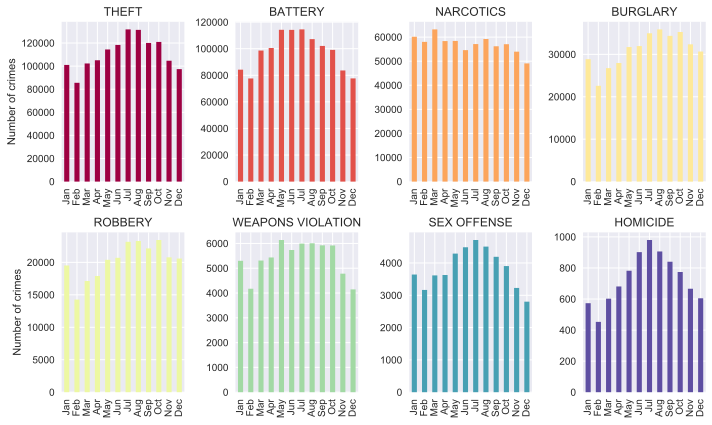

In [22]:
plt.rcParams['figure.figsize'] = 10, 6
cmap=cm.get_cmap('Spectral')
fig, axes = plt.subplots(nrows=2, ncols=4)
N=8
for k, df in enumerate(dfs):
    c = cmap(float(k)/(N-1))
    df.plot(kind='bar', x='Months', y='Number of incidents', ax=axes.flat[k], title=crime_types[k], color=c, legend=False)
for i in range(8):
    axes.flat[i].set_xlabel('')
for i in [0, 4]:
    axes.flat[i].set_ylabel('Number of crimes')
plt.tight_layout()
plt.show()

Interesting find! Among all the 8 felonies analyzed, 7 are most frequent in warmer month (June, July, and August) but Narcotics are high in colder month <br>
, namely January, February and March. Why is that? Maybe when people tend to stay indoors they use drugs more often?

In [2]:
crimes_new=pd.read_csv('crimes_new.csv')

In [23]:
# Continue to work on 12/16/17
crime_types=['THEFT', 'BATTERY', 'NARCOTICS', 'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 'SEX OFFENSE', 'HOMICIDE']
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Since we have the locations for each crime reported, we can take a look at where 'Narcotics' crimes happened and see if our explanation makes sense.

In [24]:
narcotics=crimes_new[crimes_new['Primary Type']=='NARCOTICS']
nar_loc=narcotics['Location Description'].value_counts()

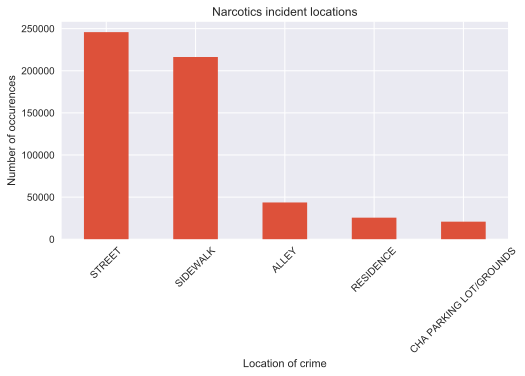

In [31]:
plt.rcParams['figure.figsize'] = 8, 4
color = cm.inferno_r(np.linspace(.4,.8, 5))
nar_loc[0:5].plot(kind='bar', color=color)
plt.xlabel('Location of crime')
plt.ylabel('Number of occurences')
plt.title('Narcotics incident locations')
plt.xticks(rotation=45)
plt.show()

Surprisingly, the top 3 locations are all outdoor. So why are 'Narcotics' crimes high in cold months? On the other hand, let's check the top 5 locations of <br>
all crimes

In [26]:
crime_loc_counts=[]
for c in crime_types:
    crime_type=crimes_new[crimes_new['Primary Type']==c]
    crime_loc=crime_type['Location Description'].value_counts()[0:5]
    crime_loc_counts.append(crime_loc)

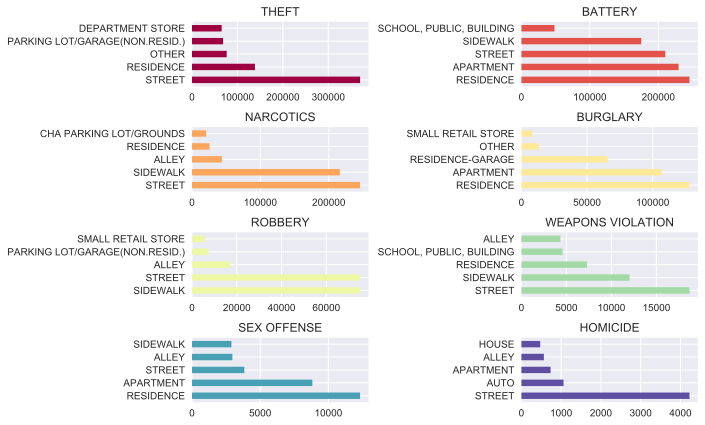

In [27]:
plt.rcParams['figure.figsize'] = 10, 6
fig, axes=plt.subplots(nrows=4, ncols=2)

for i, s in enumerate(crime_loc_counts):
    c=cmap(float(i)/(N-1))
    s.plot(kind='barh', color=c, ax=axes.flat[i], title=crime_types[i])
plt.tight_layout()
plt.show()

Narcotics happen mostly outdoors just like other crimes. So in cold weather, there are fewer people out and drug dealers are more active? This is just <br>
a hypothesis and I have no data to back it up.

For all the sex offenses incidents, most happened at either residences or apartments. How many of those are domestic? Let's take a look.

In [28]:
sex_off=crimes_new[crimes_new['Primary Type']=='SEX OFFENSE']

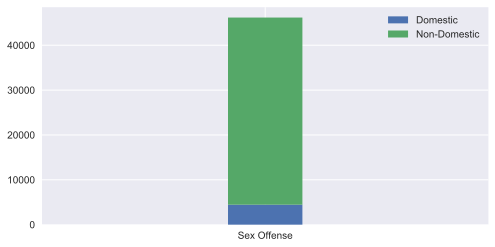

In [32]:
plt.rcParams['figure.figsize'] = 8, 4
sex_off_dome=sex_off['Domestic'].sum()
sex_off_non_dome=len(sex_off)-sex_off_dome
sex_off_df=pd.DataFrame({'Domestic': sex_off_dome, 'Non-Domestic': sex_off_non_dome}, index=np.array(['Sex Offense']))
sex_off_df.plot(kind='bar', stacked=True, width=0.1)
plt.xticks(rotation=0)
plt.show()

Most sex offenses are non-domestic. 

Now let's examine the average temperature in each month across 16 years

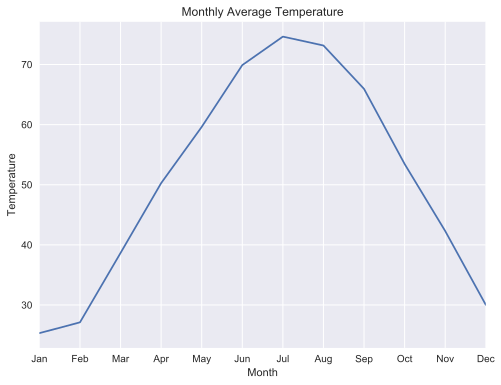

In [33]:
# We will look at the 'TAVG' column
temps=[]
for i in range(1,13):
    month=crimes_new[crimes_new.index.month==i]
    month_temp_avg=month['TAVG'].mean()
    temps.append(month_temp_avg)
plt.rcParams['figure.figsize'] = 8, 6
monthly_avg_temp=pd.Series(temps, index=months)
monthly_avg_temp.plot()
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(np.arange(12), months)
plt.show()

As expected, average temperatures are the highest during summer months (June, July and August) and low in January, February and March. How does <br>
temperature affect crimes? If we set temperatures into different bins and count the number of crimes in each bin maybe there is a correlation?

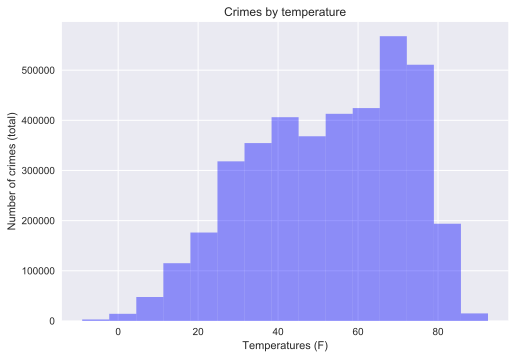

In [7]:
sns.distplot(crimes_new['TAVG'], bins=15, kde=False, color='blue')
plt.xlabel('Temperatures (F)')
plt.ylabel('Number of crimes (total)')
plt.title('Crimes by temperature')
plt.show()

So from the distribution of the crimes based on temperature, we can see that at higher temperature, there are more crimes. It makes sense since most <br>
crimes happen outdoors, the warmer the weather, the more people are outside. <br>
But what about individual crimes such as Narcotics mentioned above? What's the distribution of those crimes based on temp?  Let's compare all the <br>
histograms of the 8 felonies and their relationship to temperature.

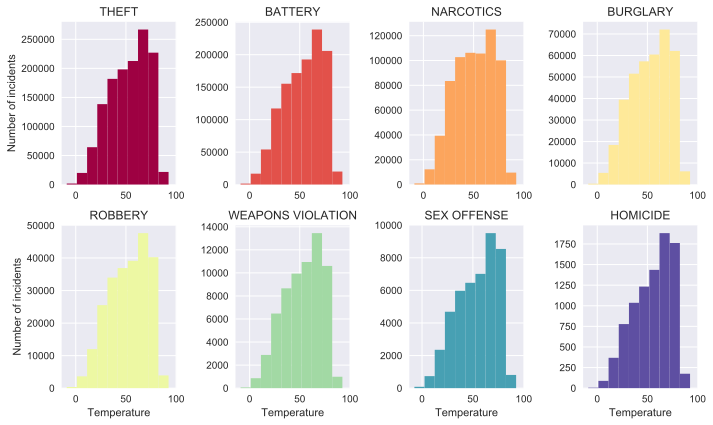

In [34]:
plt.rcParams['figure.figsize'] = 10, 6
fig2, axes2=plt.subplots(nrows=2, ncols=4)
cmap=cm.get_cmap('Spectral')
for i, c in enumerate(crime_types):
    crime_type=crimes_new[crimes_new['Primary Type']==c]
    color=cmap(float(i)/(N-1))
    crime_type['TAVG'].plot.hist(bins=10, ax=axes2.flat[i], color=color, title=c)
    axes2.flat[i].set_xticks(np.linspace(0,100, 3))
    axes2.flat[i].set_ylabel('')
axes2.flat[0].set_ylabel('Number of incidents')
axes2.flat[4].set_ylabel('Number of incidents')
axes2.flat[4].set_xlabel('Temperature')
axes2.flat[5].set_xlabel('Temperature')
axes2.flat[6].set_xlabel('Temperature')
axes2.flat[7].set_xlabel('Temperature')
plt.tight_layout()
plt.show()

Here we see that for Narcotics, there is a pretty high shoulder where temperatures are low unlike other crimes. This is in agreement with our previous <br>
plots where we plotted monthly crime data for each type of crime. There must be a reason for narcotics crimes to be higher than others in colder days.

Next let's look at the distribution of these crimes during a week. Which weekday seems to have more crimes?

In [35]:
crimes_new['Day']=crimes_new.index.day
crimes_new.head()

Unnamed: 0       ID Case Number               Date.1                     Block  IUCR Primary Type              Description               Location Description  Arrest  Domestic  Beat  District FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location        date  index  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN weather_type  Day
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                    
2001-01-01           0  3272413    HK299011  2001-01-01 00:00:00       076XX S EMERALD AVE  0842        THEFT  AGG: FINANCIAL ID THEFT                          RESIDENCE   False     False   621       6.0       06     1172658.0     1854465.0  2001  03/31/2006 10:03:38 PM  41.756087 -87.642812  (41.756086589, -87.642812325)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown    1
2001-01-01           1  5508664    HN320275  2001-01-01 00:00:00       009XX N HARDING AVE  0266  SEX OFFENSE                PREDATORY                          RESIDENCE   False      True  1112      11.0       02     1149843.0     1906023.0  2001  06/11/2007 03:52:33 PM  41.898041 -87.725087  (41.898040875, -87.725087394)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown    1
2001-01-01           2  2743135    HJ380339  2001-01-01 00:00:00         039XX N MOZART ST  0266  SEX OFFENSE                PREDATORY                          APARTMENT    True     False  1733      17.0       02     1156711.0     1926359.0  2001  08/17/2015 03:03:40 PM  41.953708 -87.699309  (41.953708013, -87.699309457)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown    1
2001-01-01           3  2126730    HH368190  2001-01-01 00:00:00       060XX W ARDMORE AVE  0281  SEX OFFENSE           NON-AGGRAVATED  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1622      16.0       02     1135010.0     1938218.0  2001  08/17/2015 03:03:40 PM  41.986663 -87.778803  (41.986663058, -87.778803492)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown    1
2001-01-01           8  1329588     G025242  2001-01-01 00:00:00  061XX S COTTAGE GROVE AV  0820        THEFT           $500 AND UNDER                             STREET   False     False   313       3.0       06     1182574.0     1864705.0  2001  08/17/2015 03:03:40 PM  41.783962 -87.606155  (41.783961993, -87.606155349)  2001-01-01      0    41.995   -87.9336      201.8  2001-01-01   0.0   0.0  17.0  14.5  24.0   5.0      Unknown    1

In [36]:
weekdays=['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
weekly_dfs=[]
for j, crime in enumerate(crime_types):
    counts=[]
    for i in range(0,7):
        weekly=crimes_new[crimes_new.index.weekday==i]
        weekly_crime=weekly[weekly['Primary Type']==crime]
        counts.append(len(weekly_crime))
    weekly_dfs.append(pd.DataFrame({'Weekday': weekdays, 'Number of incidents': counts}))
weekly_dfs[0]

Number of incidents Weekday
0               192894      Mo
1               193222      Tu
2               194380      We
3               191350      Th
4               206535      Fr
5               188276      Sa
6               166141      Su

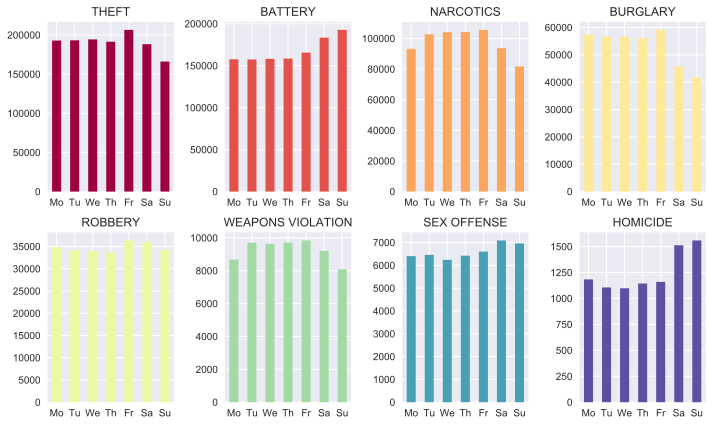

In [40]:
cmap=cm.get_cmap('Spectral')
plt.rcParams['figure.figsize'] = 10, 6
fig3, axes3= plt.subplots(nrows=2, ncols=4)
N=8
for k, df in enumerate(weekly_dfs):
    c = cmap(float(k)/(N-1))
    df.plot.bar(x='Weekday', y='Number of incidents', ax=axes3.flat[k], title=crime_types[k], color=c, legend=False, xticks=[])
for i in range(8):
    axes3.flat[i].set_xlabel('')
#for i in range(4):
    #axes3.flat[i].set_xticks([])
plt.tight_layout()
plt.show()

Battery and homicids are highest on the weekends burglary is lowest on weekends which makes sense. Theft is highest on Friday. We can see that <br>
different crimes happen differently during the week. But homicides mostly happen on the weekend in the street, which seems strange to me.

Now what about during a 24 hour period? What hour sees the highest crimes? We can still break down the data by crime types

In [54]:
hours=['12 am']+[str(x)+ ' am' for x in range(1, 12)]+['12 pm']+ [str(y) +' pm' for y in range(1, 12)]
hourly_dfs=[]
for j, crime in enumerate(crime_types):
    counts=[]
    for i in range(24):
        hourly=crimes_new[crimes_new.index.hour==i]
        hourly_crime=hourly[hourly['Primary Type']==crime]
        counts.append(len(hourly_crime))
    hourly_dfs.append(pd.DataFrame({'Hours': hours, 'Number of incidents': counts}))
hourly_dfs[0]

Hours  Number of incidents
0   12 am                75481
1    1 am                30391
2    2 am                24315
3    3 am                19394
4    4 am                14574
5    5 am                14264
6    6 am                20509
7    7 am                33168
8    8 am                51004
9    9 am                69721
10  10 am                61885
11  11 am                61240
12  12 pm                92933
13   1 pm                73996
14   2 pm                77847
15   3 pm                83200
16   4 pm                79021
17   5 pm                80712
18   6 pm                79806
19   7 pm                69519
20   8 pm                62667
21   9 pm                56095
22  10 pm                56917
23  11 pm                44139

In [55]:
for df in hourly_dfs:
    df['Crime rate']=df['Number of incidents']/df['Number of incidents'].sum()

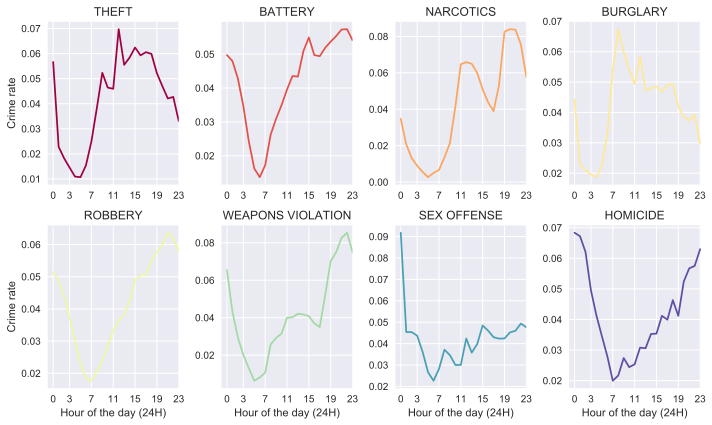

In [79]:
plt.rcParams['figure.figsize'] = 10, 6
cmap=cm.get_cmap('Spectral')
fig4, axes4= plt.subplots(nrows=2, ncols=4)
N=8
for k, df in enumerate(hourly_dfs):
    c = cmap(float(k)/(N-1))
    df.plot(x=np.arange(24), y='Crime rate', ax=axes4.flat[k], title=crime_types[k], color=c, legend=False)
for i in range(8):
    #axes4.flat[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    axes4.flat[i].xaxis.set_major_locator(plt.FixedLocator(np.array([0, 3, 7, 11, 15, 19, 23])))
    axes4.flat[i].set_xlim((-1,23))
for i in range(4,8):
    axes4.flat[i].set_xlabel('Hour of the day (24H)')
for i in [0, 4]:
    axes4.flat[i].set_ylabel('Crime rate')
plt.tight_layout()
plt.show()

<h3> Most crimes peak at late night (0 or 23) but burglary peaks around 8am (right after people leaving for work?). <br>
Narcotics however has a peak around 11am which is very interesting. Also what about the peak for battery around 3pm?</h3>

Then what about the blocks where crimes happen? Do some blocks see certain crimes or not? What blocks are safer than others?

In [37]:
crimes_new['Block'].value_counts()

001XX N STATE ST                       8706
076XX S CICERO AVE                     7281
100XX W OHARE ST                       7004
0000X N STATE ST                       6661
008XX N MICHIGAN AVE                   6392
063XX S DR MARTIN LUTHER KING JR DR    3001
001XX W 87TH ST                        2866
046XX W NORTH AVE                      2506
023XX S STATE ST                       2481
064XX S DR MARTIN LUTHER KING JR DR    2466
085XX S COTTAGE GROVE AVE              2415
005XX E BROWNING AVE                   2374
006XX N MICHIGAN AVE                   2346
0000X S STATE ST                       2331
009XX W BELMONT AVE                    2234
007XX N MICHIGAN AVE                   2229
026XX N ELSTON AVE                     2218
017XX W HOWARD ST                      2217
002XX W 87TH ST                        2209
075XX S STONY ISLAND AVE               2106
038XX W ROOSEVELT RD                   2075
021XX E 71ST ST                        2054
0000X W DIVISION ST             

Looks like 'STATE ST' is the most dangerous place

In [100]:
crimes_loc=crimes_new.loc[:, ['Primary Type', 'Latitude', 'Longitude']]

In [101]:
crimes_loc.head()

Primary Type   Latitude  Longitude
Date                                         
2001-01-01        THEFT  41.756087 -87.642812
2001-01-01  SEX OFFENSE  41.898041 -87.725087
2001-01-01  SEX OFFENSE  41.953708 -87.699309
2001-01-01  SEX OFFENSE  41.986663 -87.778803
2001-01-01        THEFT  41.783962 -87.606155

In [106]:
#Let's see if certain crimes lead to more arrests
crimes_arrest=crimes_new.loc[:, ['Primary Type', 'Arrest']]

In [107]:
crimes_arrest.head()

Primary Type  Arrest
Date                           
2001-01-01        THEFT   False
2001-01-01  SEX OFFENSE   False
2001-01-01  SEX OFFENSE    True
2001-01-01  SEX OFFENSE   False
2001-01-01        THEFT   False

In [108]:
#Set a count for either arrest or no arrest
crimes_arrest['count']=1

In [112]:
#Pivot the table for making plotting easier
crimes_arrest_table=pd.pivot_table(crimes_arrest, values='count', index='Primary Type', columns='Arrest', aggfunc=np.sum)

In [139]:
crimes_arrest_table

Arrest               False   True 
Primary Type                      
BATTERY             904498  269173
BURGLARY            351877   21438
HOMICIDE              4634    4130
NARCOTICS             3866  681366
ROBBERY             219561   23742
SEX OFFENSE          35092   11083
THEFT              1170877  161921
WEAPONS VIOLATION    12684   52181

Since the numbers vary so much, it's better to plot the percentages instead

In [166]:
crimes_arrest_table['Arrested']=crimes_arrest_table[True]/(crimes_arrest_table[False]+crimes_arrest_table[True])
crimes_arrest_table['Not Arrested']=crimes_arrest_table[False]/(crimes_arrest_table[False]+crimes_arrest_table[True])

In [167]:
crimes_arrest_table

Arrest               False    True  Arrested  Not Arrested
Primary Type                                              
BATTERY             904498  269173  0.229343      0.770657
BURGLARY            351877   21438  0.057426      0.942574
HOMICIDE              4634    4130  0.471246      0.528754
NARCOTICS             3866  681366  0.994358      0.005642
ROBBERY             219561   23742  0.097582      0.902418
SEX OFFENSE          35092   11083  0.240022      0.759978
THEFT              1170877  161921  0.121490      0.878510
WEAPONS VIOLATION    12684   52181  0.804455      0.195545

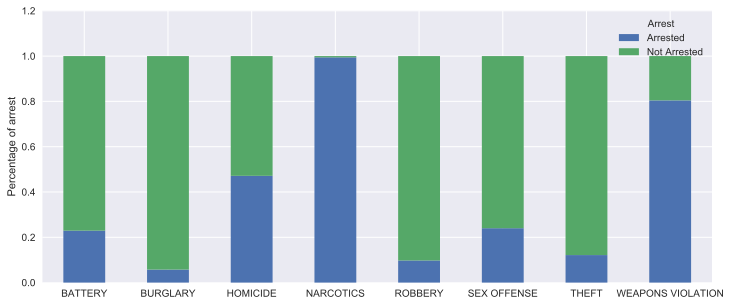

In [177]:
plt.rcParams['figure.figsize']=12, 5
crimes_arrest_table.loc[:, ['Arrested', 'Not Arrested']].plot(kind='bar', stacked=True)
plt.ylim((0, 1.2))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Percentage of arrest')
plt.show()

Looks like the most arrests are made for Narcotics and Weapons violation. Narcotics are so extreme that about 99 percent cases resulting in an arrest.

So what are the locations that most arrest are made? And the blocks? Maybe we can visualize all the arrests on the map and get a clue.

In [185]:
fig2=gmaps.figure(display_toolbar=False, center=chicago_coord, zoom_level=11)
fig2._map.layout.width='500px'
fig2._map.layout.height='600px'
arrest_layer=gmaps.heatmap_layer(crimes_new[crimes_new['Arrest']==True][['Latitude', 'Longitude']])
fig2.add_layer(arrest_layer)
title=widgets.HBox([widgets.HTML('<b>Arrests made</b>')], layout=widgets.Layout(width='50%', justify_content='center'))
widgets.VBox([title, fig2])

A Jupyter Widget